In [1]:
import statistics as stat
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import chi2_contingency

In [2]:
df=pd.read_csv('/Users/geethuvishnu/Desktop/StudentsPerformance.csv')

In [3]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [5]:
df.count()

gender                         1000
race/ethnicity                 1000
parental level of education    1000
lunch                          1000
test preparation course        1000
math score                     1000
reading score                  1000
writing score                  1000
dtype: int64

In [6]:
df.shape

(1000, 8)

In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     85
reading score                  72
writing score                  77
dtype: int64

# 1. Find out how many males and females participated in the test

In [10]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

# 2.What do you think about the students parental level of education?

In [11]:
df['parental level of education'].unique()

array(['some high school', 'high school', 'some college',
       "associate's degree", "bachelor's degree", "master's degree"],
      dtype=object)

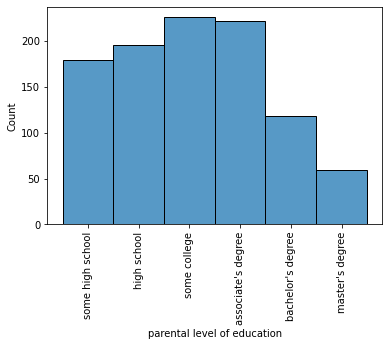

In [12]:
sns.histplot(df['parental level of education'])
plt.xticks(rotation=90)
plt.show()

# 3. Who scores the most on average for math, reading and writing based on a) Gender, b)Test preparation course

In [13]:
student_detail=df.drop(['race/ethnicity','parental level of education'],axis=1)

In [14]:
student_detail

,gender,lunch,test preparation course,math score,reading score,writing score
0,female,free/reduced,none,0,17,10
1,female,free/reduced,none,8,24,23
2,female,free/reduced,none,18,32,28
3,female,standard,none,11,38,32
4,female,free/reduced,none,22,39,33
...,...,...,...,...,...,...
995,male,standard,completed,99,87,81
996,male,standard,completed,100,96,86
997,male,standard,completed,100,97,99
998,male,free/reduced,completed,100,100,93


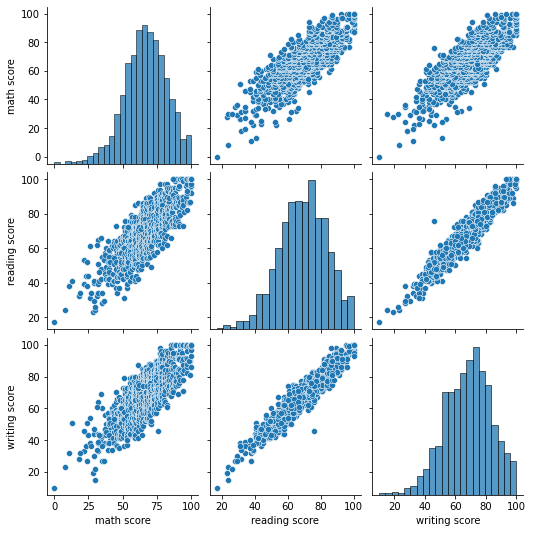

In [15]:
sns.pairplot(student_detail)

In [16]:
corelation=student_detail.corr()

<AxesSubplot:>

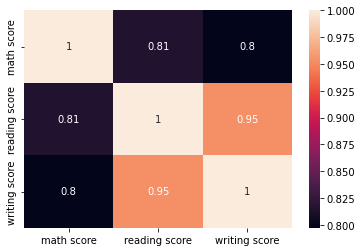

In [17]:
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

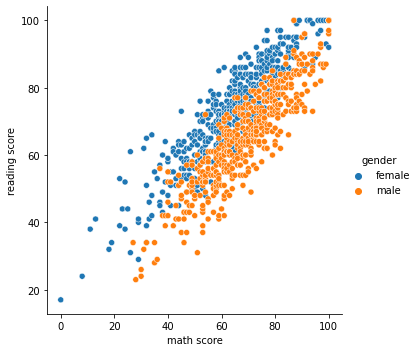

In [18]:
sns.relplot(x='math score',y='reading score',hue='gender',data=student_detail)

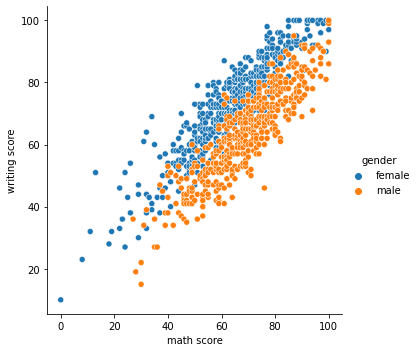

In [19]:
sns.relplot(x='math score',y='writing score',hue='gender',data=student_detail)

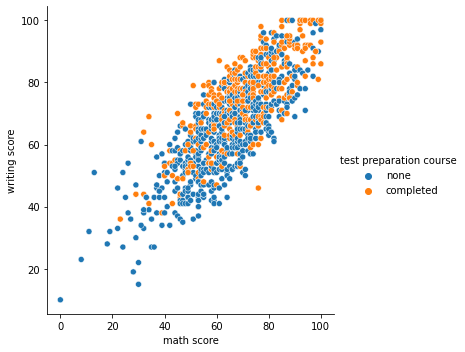

In [20]:
sns.relplot(x='math score',y='writing score',hue='test preparation course',data=student_detail)

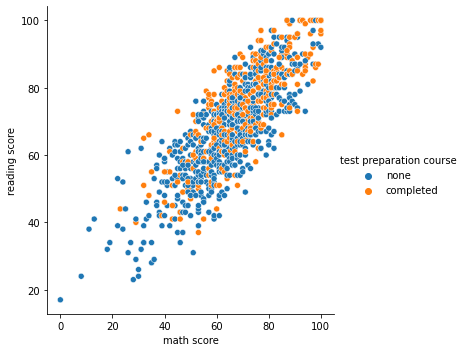

In [21]:
sns.relplot(x='math score',y='reading score',hue='test preparation course',data=student_detail)

# 4.What do you think about the scoring variation for math,reading and writing based on Gender,Test preparation course

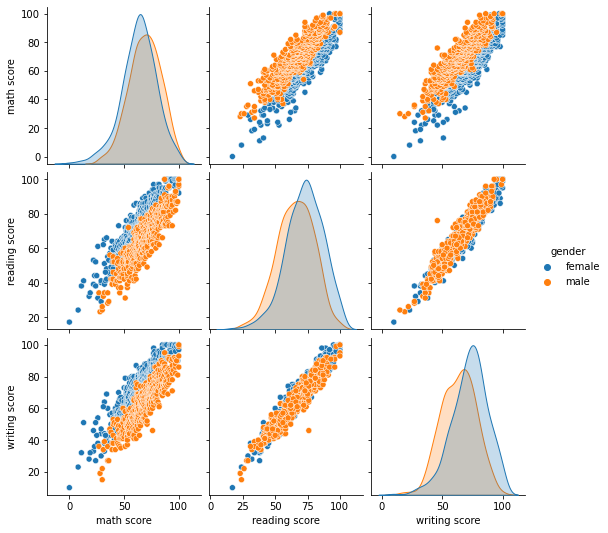

In [22]:
sns.pairplot(student_detail,hue='gender')

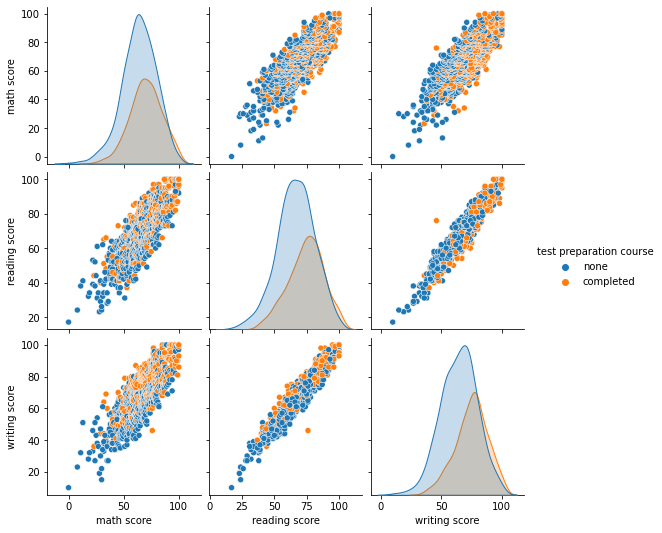

In [23]:
sns.pairplot(student_detail,hue='test preparation course')

# 5.The management needs your help to give bonus points to the top 25% of students based on their math score , so how will you help the management to acheive this?

In [24]:
dataset=df[['math score']]

In [25]:
dataset

,math score
0,0
1,8
2,18
3,11
4,22
...,...
995,99
996,100
997,100
998,100


(array([  2.,   4.,  13.,  31.,  86., 185., 264., 221., 135.,  59.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

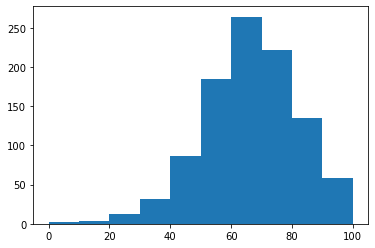

In [26]:
plt.hist(dataset)

In [27]:
q1,q3=np.percentile(dataset,[25,75])

In [28]:
print(q1,q3)

57.0 77.0


In [29]:
iqr=q3-q1

In [30]:
lower_fence=q1-(1.5*iqr)
higher_fence=q3+(1.5*iqr)

In [31]:
print(lower_fence,higher_fence)

27.0 107.0


<AxesSubplot:xlabel='math score'>

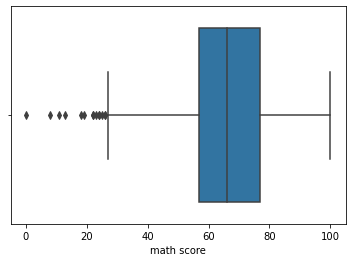

In [32]:
sns.boxplot(x='math score',data=dataset)